# Resolver $y'=x\sqrt{y}, \; y(0)=0$
Esta es una ecuación separable. Si suponemos que $y(0)=y_0$, entonces la solución es $y(x)=(\frac{x^2}{4}+\sqrt{y_0})^2$

In [1]:
#Importar bibliotecas de matemáticas y graficación
import math
import matplotlib.pyplot as plt

Primero hay que definir la función $f(x,y)$ tal que $y'=f(x,y)$

In [2]:
f=lambda x,y: x*math.sqrt(y)

## Método de Euler
$y_{n+1}=y_n +hf(x_n,y_n)$

In [3]:
#f0=función, (x0,y0)=condición inicial, xf=punto final, h0=tamaño de incremento
def euler(f0,x0,y0,xf,h0):
    n0=int((xf-x0)/h0)
    X=[x0+i*h0 for i in range(n0+1)]
    Y=[y0]
    for x in X:
        Y.append(Y[-1]+h0*f0(x,Y[-1]))
    
    return X,Y[:-1]

## Método RK2
$y_{n+1}=y_n +\frac{h}{2}(k_1+k_2)$ <br/>
donde: <br/>

$k_1=f(x_n,y_n)$ <br/>
$k_2=f(x_n+h,y_n+hk_1)$

In [4]:
#f0=función, (x0,y0)=condición inicial, xf=punto final, h0=tamaño de incremento
def rk2(f0,x0,y0,xf,h0):
    n0=int((xf-x0)/h0)
    X=[x0+i*h0 for i in range(n0+1)]
    Y=[y0]
    for x in X:
        k1=f0(x,Y[-1])
        k2=f0(x+h0,Y[-1]+h0*k1)
        Y.append(Y[-1]+(h0/2)*(k1+k2))
    return X,Y[:-1]

## Método RK4
$y_{n+1}=y_n +\frac{h}{6}(k_1+2k_2+2k_3+k_4)$ <br/>
donde: <br/>

$k_1=f(x_n,y_n)$ <br/>
$k_2=f(x_n+\frac{1}{2}h,y_n+\frac{1}{2}hk_1)$ <br/>
$k_3=f(x_n+\frac{1}{2}h,y_n+\frac{1}{2}hk_2)$ <br/>
$k_4=f(x_n+h,y_n+hk_3)$

In [5]:
#f0=función, (x0,y0)=condición inicial, xf=punto final, h0=tamaño de incremento
def rk4(f0,x0,y0,xf,h0):
    n0=int((xf-x0)/h0)
    X=[x0+i*h0 for i in range(n0+1)]
    Y=[y0]
    for x in X:
        k1=f0(x,Y[-1])
        k2=f0(x+h0/2,Y[-1]+h0*k1/2)
        k3=f0(x+h0/2,Y[-1]+h0*k2/2)
        k4=f0(x+h0,Y[-1]+h0*k3)
        Y.append(Y[-1]+(h0/6)*(k1+2*k2+2*k3+k4))
    return X,Y[:-1]

## Comparación

<IPython.core.display.Javascript object>


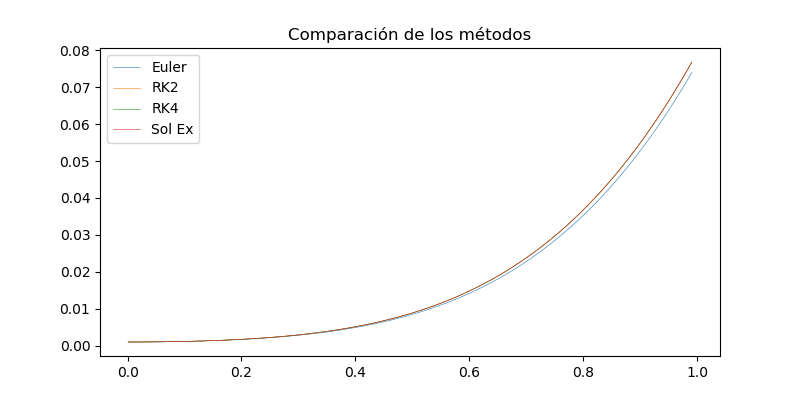

In [8]:
%matplotlib notebook
#Ajustar parámetros
h=0.01
x_0=1e-3
y_0=1e-3
x_f=1

#Usar las funciones definidas anteriormente
EU=euler(f,x_0,y_0,x_f,h)
RK2=rk2(f,x_0,y_0,x_f,h)
RK4=rk4(f,x_0,y_0,x_f,h)

#Calcular la solución exacta
EXx=[x_0+i*h for i in range(int((x_f-x_0)/h)+1)]
EXy=[((x**2)/4+math.sqrt(y_0))**2 for x in EXx]

#Graficar
plt.figure(figsize=(8,4))

plt.plot(EU[0],EU[1],lw=0.4,label='Euler')
plt.plot(RK2[0],RK2[1],lw=0.4,label='RK2')
plt.plot(RK4[0],RK4[1],lw=0.4,label='RK4')
plt.plot(EXx,EXy,lw=0.4,label='Sol Ex')

plt.title('Comparación de los métodos')
plt.legend()
plt.savefig('grafica.pdf',format='pdf')

In [7]:
A=[i for i in range(3,10)]

In [8]:
A[0]

3

In [9]:
f=lambda x,y:math.sin(x*y**3)*math.sqrt(y)
S=euler(f,1,1,50,0.00003)

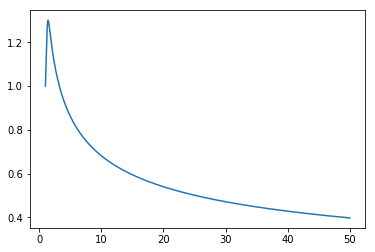

In [10]:
plt.plot(S[0],S[1])